## Import, 한글, 템플릿

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)
plt.style.use('seaborn-v0_8-pastel')

## 데이터 로드

In [ ]:
# 서울올림픽기념국민체육진흥공단, 실태조사_종목별 시설업체 안전관리 실시현황 로드
safe_management = pd.read_csv('./서울올림픽기념국민체육진흥공단_종목별 시설업체 안전관리 실시현황_20221231.csv')

# 해양경찰청, 유형별 수상레저 피해 사고현황 로드
water_accident1 = pd.read_csv('./해양경찰청_유형별 수상레저 피해 사고현황_20221231.csv', encoding='cp949')

# 해양경찰청, 원인별 수상레저 인명피해 사고현황 로드
water_accident2 = pd.read_csv('./해양경찰청_원인별 수상레저 인명피해 사고현황_20221231.csv', encoding='cp949')

# 해양경찰청, 기구별 수상레저 피해 사고현황 로드
water_accident3 = pd.read_csv('./해양경찰청_기구별 수상레저 피해 사고현황_20221231.csv', encoding='cp949')

## 데이터 전처리

In [ ]:
# 종목구분이 '수상'인 데이터만 추출
safe_management_water = safe_management[(safe_management['종목구분'] == '수상') & (safe_management['운영종목'] != '전체')]

# 연도별 비교 그래프를 생성하기 위해 연도별로 분리
safe_management_water_2019 = safe_management_water[safe_management_water['기준연도'] == 2019]
safe_management_water_2020 = safe_management_water[safe_management_water['기준연도'] == 2020]
safe_management_water_2021 = safe_management_water[safe_management_water['기준연도'] == 2021]
safe_management_water.head()

,기준연도,종목구분,운영종목,사업체 수,이용객 대상 안전교육 실시(율),직원 대상 내부 안전교육 실시(율),안전관리 매뉴얼_체크리스트 보유(율),자격증 보유 직원 고용(율),시설_장비 대상 자체 안전점검(율),시설_장비 대상 외부 안전검사(율),비상 대피 탈출구 확보(율)
13,2019,수상,래프팅,225,100.0,97.7,94.3,93.2,100.0,97.7,83.0
14,2019,수상,웨이크보드/수상스키,268,100.0,96.8,96.8,96.1,99.4,98.1,91.6
15,2019,수상,워터슬라이드,44,100.0,100.0,100.0,100.0,100.0,100.0,90.9
16,2019,수상,수상오토바이,26,100.0,75.0,100.0,87.5,100.0,100.0,87.5
17,2019,수상,윈드서핑/서핑,199,100.0,81.8,92.6,74.4,100.0,89.3,71.9


In [ ]:
# 연도별 안전사고의 총합을 계산한 ‘합계’ 열 생성
water_accident1_prep = water_accident1.iloc[[4, 5, 6]].reset_index(drop=True)
water_accident1_prep['합계'] = water_accident1_prep.sum(axis=1) - water_accident1_prep['년도']
water_accident1_prep

,년도,침몰,화재,전복,좌초,표류,충돌,기타,합계
0,2019,1,1,7,2,2,15,6,34
1,2020,2,0,5,3,2,23,9,44
2,2021,2,1,8,1,0,19,1,32


In [ ]:
# 연도별 안전사고의 총합을 계산한 ‘합계’ 열 생성
water_accident2_prep = water_accident2.iloc[[4, 5, 6]].reset_index(drop=True)
water_accident2_prep['합계'] = water_accident2_prep.sum(axis=1) - water_accident2_prep['년도']
water_accident2_prep

,년도,운항부주의,무리한운항,기관정비불량,선체결함,조종미숙,기타,합계
0,2019,18,1,0,2,4,9,34
1,2020,26,0,6,2,5,5,44
2,2021,26,1,1,1,2,1,32


In [ ]:
# 연도별 안전사고의 총합을 계산한 ‘합계’ 열 생성
water_accident3_prep = water_accident3.iloc[[4, 5, 6]].reset_index(drop=True)
water_accident3_prep['합계'] = water_accident3_prep.sum(axis=1) - water_accident3_prep['년도']
water_accident3_prep

,년도,모터보트,고무보트,수상오토바이,요트,워터슬레드,기타,합계
0,2019,25,5,0,1,0,3,34
1,2020,18,7,1,3,0,15,44
2,2021,16,8,3,1,0,4,32


## 수상 안전관리 실태 시각화

### 연도별 높게 유지되는 수치 추이

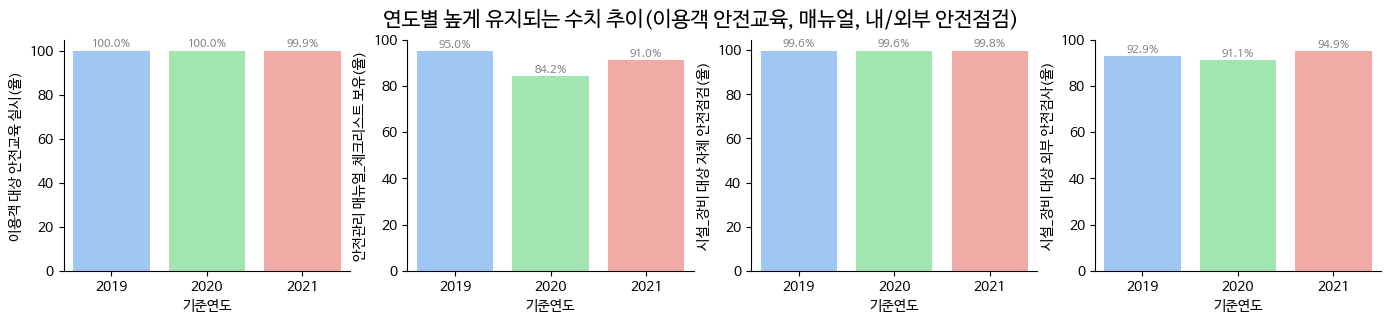

In [ ]:
cols = ['이용객 대상 안전교육 실시(율)', '안전관리 매뉴얼_체크리스트 보유(율)', '시설_장비 대상 자체 안전점검(율)', '시설_장비 대상 외부 안전검사(율)']
plt.figure(figsize=(17, 3))
plt.suptitle("연도별 높게 유지되는 수치 추이(이용객 안전교육, 매뉴얼, 내/외부 안전점검)", fontsize=15)
for i, col in enumerate(cols, start=1):
    plt.subplot(1, 4, i)
    ax = sns.barplot(data = safe_management_water, x='기준연도', y=col, errorbar=None)
    plt.yticks([0, 20, 40, 60, 80, 100])
    sns.despine(right=True)

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height() - 3),
                ha='center', va='center', fontsize=8, color='grey', xytext=(0, 10),
                textcoords='offset points')

### 연도별 감소하는 수치 추이

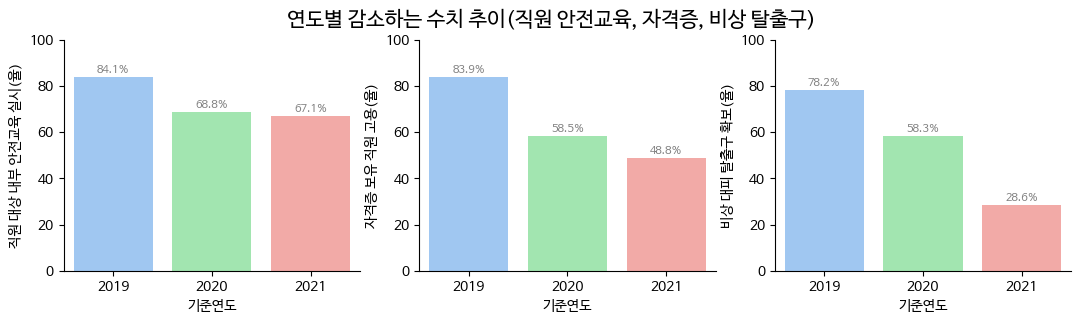

In [ ]:
cols = ['직원 대상 내부 안전교육 실시(율)', '자격증 보유 직원 고용(율)', '비상 대피 탈출구 확보(율)']
plt.figure(figsize=(13, 3))
plt.suptitle("연도별 감소하는 수치 추이(직원 안전교육, 자격증, 비상 탈출구)", fontsize=15)

for i, col in enumerate(cols, start=1):
    plt.subplot(1, 3, i)
    ax = sns.barplot(data = safe_management_water, x='기준연도', y=col, errorbar=None)
    plt.yticks([0, 20, 40, 60, 80, 100])
    sns.despine(right=True)

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height() - 3),
                ha='center', va='center', fontsize=8, color='grey', xytext=(0, 10),
                textcoords='offset points')

### 연도별 비상 대피 탈출구 확보율

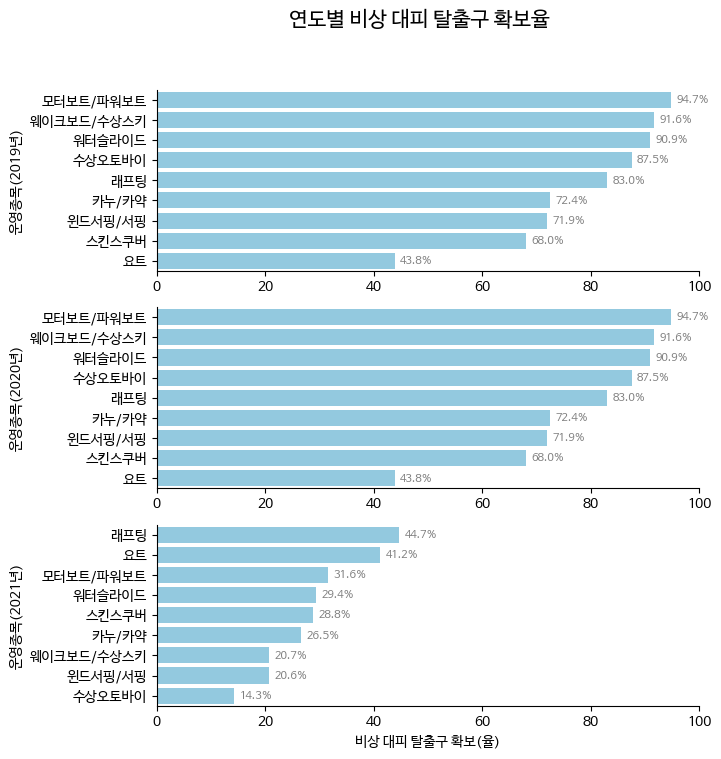

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(7, 8))
fig.suptitle("연도별 비상 대피 탈출구 확보율", fontsize=15)
sns.despine(right=True)

# 2019년
x_val = ['모터보트/파워보트', '웨이크보드/수상스키', '워터슬라이드', '수상오토바이', '래프팅', '카누/카약', '윈드서핑/서핑', '스킨스쿠버', '요트']
y_val = safe_management_water_2019.groupby('운영종목')['비상 대피 탈출구 확보(율)'].mean()
y_val = np.sort(y_val)[::-1]

ax = sns.barplot(x=y_val, y=x_val, color='skyblue', ax=axes[0])
axes[0].set_xticks([0, 20, 40, 60, 80, 100])
axes[0].set_ylabel('운영종목(2019년)')
for i, v in enumerate(y_val):
    ax.text(v + 1, i, f'{v:.1f}%', color='grey', va='center', fontsize=8)

# 2020년
x_val = ['모터보트/파워보트', '웨이크보드/수상스키', '워터슬라이드', '수상오토바이', '래프팅', '카누/카약', '윈드서핑/서핑', '스킨스쿠버', '요트']
y_val = safe_management_water_2019.groupby('운영종목')['비상 대피 탈출구 확보(율)'].mean()
y_val = np.sort(y_val)[::-1]

ax = sns.barplot(x=y_val, y=x_val, color='skyblue', ax=axes[1])
axes[1].set_xticks([0, 20, 40, 60, 80, 100])
axes[1].set_ylabel('운영종목(2020년)')
for i, v in enumerate(y_val):
    ax.text(v + 1, i, f'{v:.1f}%', color='grey', va='center', fontsize=8)

# 2021년
x_val = ['래프팅', '요트', '모터보트/파워보트', '워터슬라이드', '스킨스쿠버', '카누/카약', '웨이크보드/수상스키', '윈드서핑/서핑', '수상오토바이']
y_val = safe_management_water_2021.groupby('운영종목')['비상 대피 탈출구 확보(율)'].mean()
y_val = np.sort(y_val)[::-1]

ax = sns.barplot(x=y_val, y=x_val, color='skyblue', ax=axes[2])
plt.xticks([0, 20, 40, 60, 80, 100])
axes[2].set_xlabel('비상 대피 탈출구 확보(율)')
axes[2].set_ylabel('운영종목(2021년)')
for i, v in enumerate(y_val):
    ax.text(v + 1, i, f'{v:.1f}%', color='grey', va='center', fontsize=8)

## 수상레저스포츠 안전사고 추이 시각화

### 연도별 안전사고 발생 수

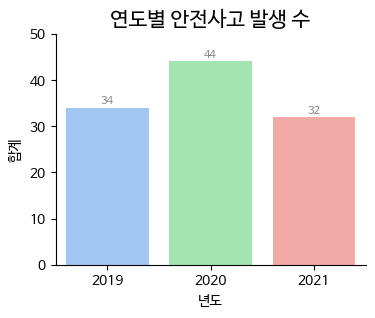

In [ ]:
plt.figure(figsize=(4, 3))
sns.barplot(data=water_accident1_prep, x='년도', y='합계')
plt.title("연도별 안전사고 발생 수", fontsize=15)
sns.despine(right=True)
plt.yticks([0, 10, 20, 30, 40, 50])

for v, i in enumerate(water_accident1_prep['합계']):
    plt.text(v, i+1.5, i, color='grey', ha='center', va='center', fontsize=8)

### 연도별 안전사고 유형 비율

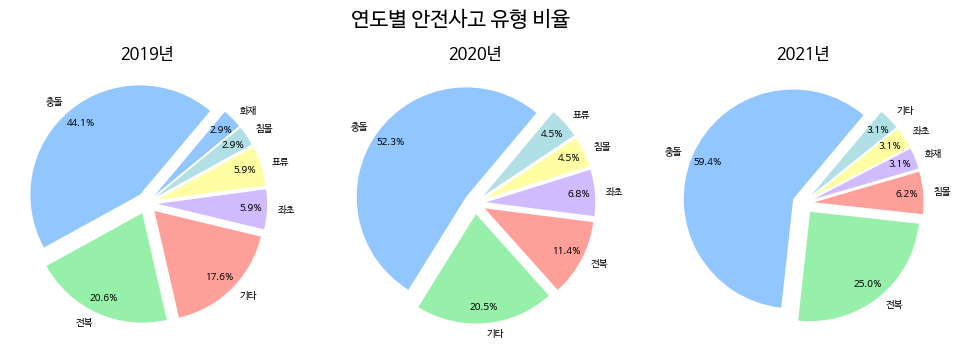

In [ ]:
plt.figure(figsize=(12, 4))
plt.suptitle("연도별 안전사고 유형 비율", fontsize=15)

for i in range(1, 4):
    plt.subplot(1, 3, i)

    tmp = water_accident1_prep.drop(['합계','년도'], axis=1).iloc[i - 1].sort_values(ascending=False)
    tmp = tmp[tmp != 0]
    if i in [2, 3]:
        ax = plt.pie(tmp, autopct='%.1f%%', labels=tmp.keys(), pctdistance=0.85, explode=[0.1,0.1,0.1,0.1,0.1,0.1], startangle=50, textprops={'fontsize':7})
    else:
        ax = plt.pie(tmp, autopct='%.1f%%', labels=tmp.keys(), pctdistance=0.85, explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1], startangle=50, textprops={'fontsize':7})
    plt.title(f'{2018 + i}년')

### 연도별 안전사고 원인 비율

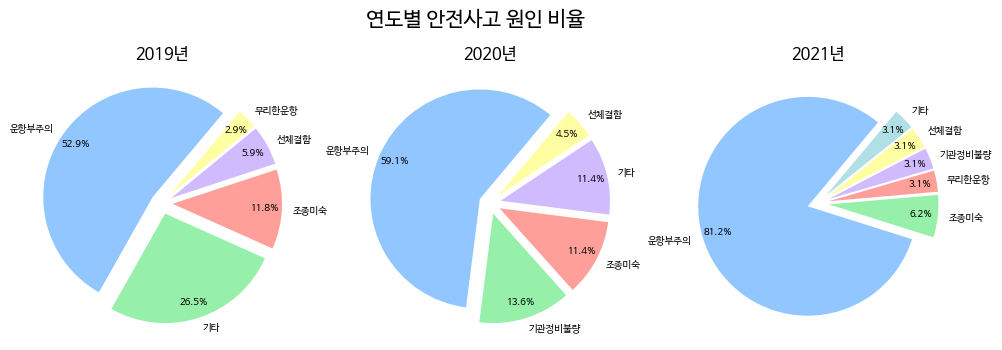

In [ ]:
plt.figure(figsize=(12, 4))
plt.suptitle("연도별 안전사고 원인 비율", fontsize=15)

for i in range(1, 4):
    plt.subplot(1, 3, i)

    tmp = water_accident2_prep.drop(['합계','년도'], axis=1).iloc[i - 1].sort_values(ascending=False)
    tmp = tmp[tmp != 0]

    if i in [1, 2]:
        ax = plt.pie(tmp, autopct='%.1f%%', labels=tmp.keys(), pctdistance=0.85, explode=[0.1,0.1,0.1,0.1,0.1], startangle=50, textprops={'fontsize':7})
    else:
        ax = plt.pie(tmp, autopct='%.1f%%', labels=tmp.keys(), pctdistance=0.85, explode=[0.1,0.1,0.1,0.1,0.1,0.1], startangle=50, textprops={'fontsize':7})
    plt.title(f'{2018 + i}년')

### 연도별 안전사고 기구 비율

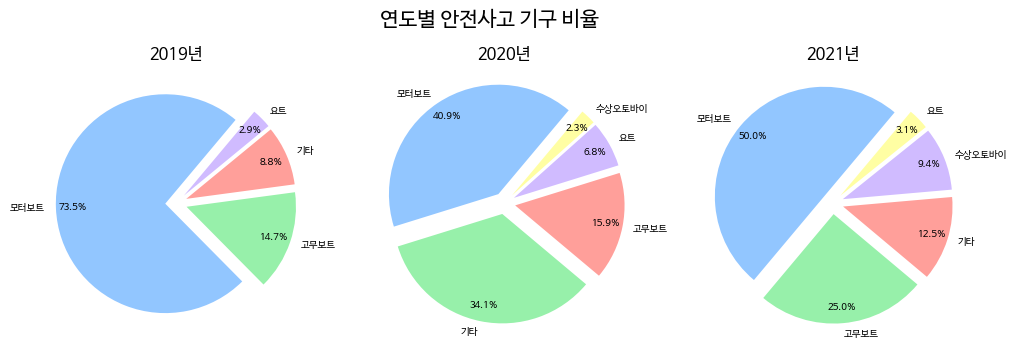

In [ ]:
plt.figure(figsize=(12, 4))
plt.suptitle("연도별 안전사고 기구 비율", fontsize=15)

for i in range(1, 4):
    plt.subplot(1, 3, i)

    tmp = water_accident3_prep.drop(['합계','년도'], axis=1).iloc[i - 1].sort_values(ascending=False)
    tmp = tmp[tmp != 0]

    if i in [1]:
        ax = plt.pie(tmp, autopct='%.1f%%', labels=tmp.keys(), pctdistance=0.85, explode=[0.1,0.1,0.1,0.1], startangle=50, textprops={'fontsize':7})
    else:
        ax = plt.pie(tmp, autopct='%.1f%%', labels=tmp.keys(), pctdistance=0.85, explode=[0.1,0.1,0.1,0.1,0.1], startangle=50, textprops={'fontsize':7})
    plt.title(f'{2018 + i}년')